# **C213: Sistemas Embarcados**
**Professor**: Samuel Baraldi Mafra

**PED:** Igor Gonçalves de Souza

## **Objetivos:**
Este exemplo visa detalhar a criação de Funções de Transferência e plotagem da Resposta Típica para Sistemas de Primeira Ordem.

Conteúdo:
  + Pacote python-control;
  + Sistemas de Primeira Ordem em Malha Aberta;
  + Método `step_info()` e parâmetros de resposta do Sistema;
  + Sistemas de Primeira Ordem em Malha Fechada;
  + Comparação Malha Aberta *vs* Malha Fechada.


### **Sistemas de Primeira Ordem:**
O modelo matemático de um Sistema pode ser representado através de uma Função de Transferência que relaciona os sinais de saída - $PV(s)$, e entrada - $SP(s)$, por meio da transformada de Laplace.

Para um Sistema de Primeira Ordem, a Função de Transferência na forma canônica é dada pelo modelo a seguir, em que *k* é o **Ganho Estático** e $\tau$, a **constante de Tempo**: $$$$

$$ H(s) = \frac{PV(s)}{SP(s)} = \frac{k}{\tau s+1}.$$ $$$$

Os Sistemas de Controle podem operar em:
  - **malha aberta**: sistemas em que o sinal de saída não
exerce nenhuma ação de controle;
  - **malha fechada**: sistemas em que o sinal de saída gera um erro no processo, o qual é realimentado como ação de controle do sistema.

A Resposta Típica de Sistemas de Primeira Ordem para uma entrada do tipo Degrau tem uma variação exponencial em função da constante de tempo $\tau$, conforme gráfico a seguir: $$$$

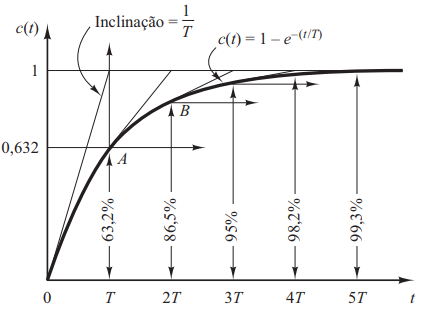

A curva de resposta é dividida em dois regimes:
  - **resposta transitória**: estado inicial do sistema, em que o sinal varia muito rapidamente no tempo e que tende à um estado final chamado de resposta estacionária ou permanente;
  - **resposta estacionária**: regime em que o comportamento do sinal de saída não varia (ou varia muito pouco) com o tempo. A amplitude estacionária do processo é definida como **valor final**.

No regime transitório, a amplitude da saída atinge $63.21\%$ do valor final após uma constante de tempo. Após a segunda constante de tempo, $86.47\%$ do valor final. Para instantes $t \geq 4\tau$ a resposta do sistema entra em regime permanente com $98\%$ do valor final, considerando
o **critério dos $2\%$**.


### **Pacote Control**
A Biblioteca de Sistemas de Controle Python (python-control) é um pacote que implementa operações básicas para análise e projeto de Sistemas de Controle.

Acesse: [Documentação python-control](https://pypi.org/project/control/)

In [1]:
#!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 8.7 MB/s eta 0:00:00


In [2]:
import numpy as np                # Suporte para arrays e operações matemáticas.
import control as ctrl            # Suporte para manipulação de Sistemas de Controle.
import matplotlib.pyplot as plt   # Suporte para visualização de gráficos.

### **Sistemas de Primeira Ordem em Malha Aberta:**
Para criação de um modelo de Função de Transferência, utilize o método `tf([num], [den])` com Vetores indicando os coeficientes dos polinômios do numerador e denominador.

Convencionalmente, as variáveis para Sistemas de Controle são nomeadas por `sys`.

Acesse: [control.TransferFunction](https://python-control.readthedocs.io/en/0.10.1/generated/control.TransferFunction.html)

Como exemplo, o Sistema de Controle com $k=3$ e $\tau=10$ tem como modelo $$$$
$$ H(s) = \frac{3}{10s+1}. $$

In [18]:
sys = ctrl.tf(3, [10, 1])
print(sys)

<TransferFunction>: sys[32]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   3
--------
10 s + 1



Para observar a Resposta do Sistema de Controle à diferentes tipos de entrada, utilize as fontes:
  - `ctrl.impulse(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Impulso**. Veja mais em [Resposta ao Impulso](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)
  - `ctrl.step(tf)`: resposta do Sistema de Controle à uma entrada do tipo **Degrau**. Veja mais em [Resposta ao Degrau](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions)

Acesse: [Funções de Resposta](https://python-control.readthedocs.io/en/0.10.1/plotting.html#response-functions) para Resposta do Sistema à outros tipos de entrada.

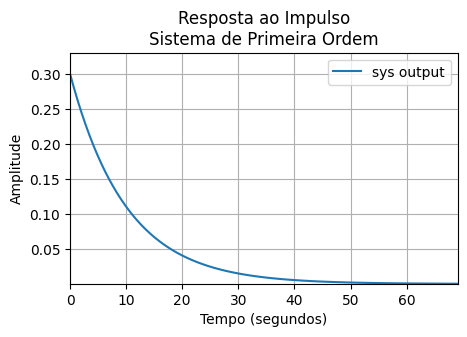

<Figure size 640x480 with 0 Axes>

In [19]:
# Amostras de Amplitude da Resposta ao Impulso ao longo do Tempo.
# ctrl.impulse_response(sys).plot()
[Tempo, Amplitude] = ctrl.impulse_response(sys)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.title('Resposta ao Impulso\nSistema de Primeira Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('Impulso.png', dpi=300);

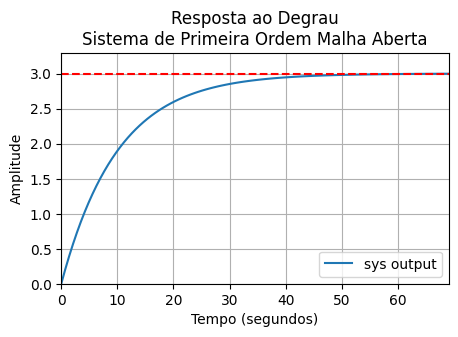

<Figure size 640x480 with 0 Axes>

In [20]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys).plot()
[Tempo, Amplitude] = ctrl.step_response(sys)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Primeira Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('Degrau.png', dpi=300);

Para um Degrau de amplitude diferente de $1$, multiplique a Função de Transferência na chamada do método `step_response()`.

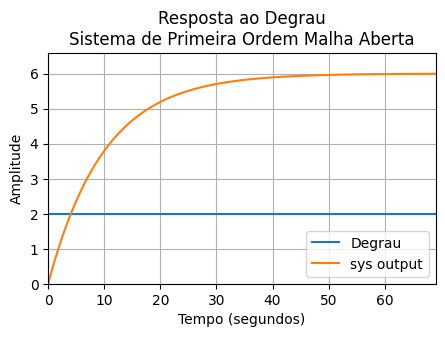

<Figure size 640x480 with 0 Axes>

In [21]:
# Defina a amplitude do Degrau de Entrada.
amplitudeDegrau = 2;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys*amplitudeDegrau).plot()
[Tempo, Amplitude] = ctrl.step_response(sys*amplitudeDegrau)
Degrau = np.ones(np.size(Tempo))*amplitudeDegrau

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.title('Resposta ao Degrau\nSistema de Primeira Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);

Para definir um valor inicial $V_0$ some a amplitude no retorno do método `step_response()`:

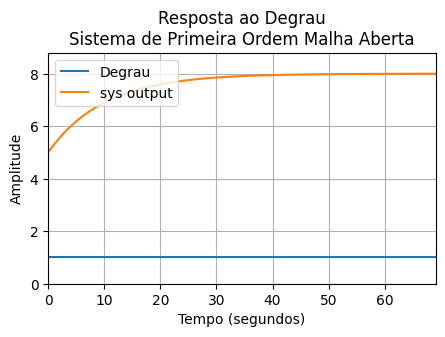

<Figure size 640x480 with 0 Axes>

In [22]:
# Defina o valor inicial do processo:
valorInicial = 5;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys).plot()
[Tempo, Amplitude] = ctrl.step_response(sys)
Degrau = np.ones(np.size(Tempo))
Amplitude += valorInicial

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.title('Resposta ao Degrau\nSistema de Primeira Ordem Malha Aberta')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([0, np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='upper left'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);

### **Parâmetros da Resposta do Sistema - `step_info()`**
O método `step_info(sys)` retorna um `dict` com os parâmetros da Resposta ao Degrau do Sistema de Controle:
  - ***RiseTime* (Tempo de Subida)**: tempo de $10\%$ a $90\%$ do valor final;
  - ***SettlingTime* (Tempo de Acomodação)**: tempo para entrar no regime permanente segundo o Critério dos $2\%$, a $98\%$ do valor final;
  - ***SteadyStateValue* (Valor Final)**: amplitude do processo em regime permanente.

Acesse: [Método step_info()](https://python-control.readthedocs.io/en/0.10.1/generated/control.step_info.html#control.step_info)


In [23]:
infos_malhaAberta = ctrl.step_info(sys);
print('Parâmetros da resposta do Sistema:',
      f'  - Tempo de Subida: {infos_malhaAberta.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaAberta.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaAberta.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema:
  - Tempo de Subida: 22.33 [s]
  - Tempo de Acomodação: 39.77 [s]
  - Valor Final: 3.00


In [24]:
infos_malhaAberta.keys()

dict_keys(['RiseTime', 'SettlingTime', 'SettlingMin', 'SettlingMax', 'Overshoot', 'Undershoot', 'Peak', 'PeakTime', 'SteadyStateValue'])

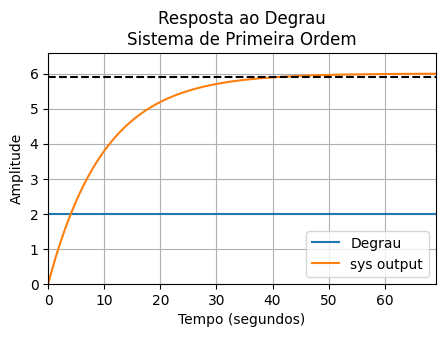

<Figure size 640x480 with 0 Axes>

In [25]:
# Defina a amplitude do Degrau de Entrada.
amplitudeDegrau = 2;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.step_response(sys*amplitudeDegrau).plot()
[Tempo, Amplitude] = ctrl.step_response(sys*amplitudeDegrau)
Degrau = np.ones(np.size(Tempo))*amplitudeDegrau

# Seja SettlingTime o Instanmte em que o Sistema entrada em Regime Permanente
# e regimePermanente a amplitude do processo neste instante.
settlingTime = np.where(Tempo == infos_malhaAberta.get('SettlingTime'))[0][0]
regimePermanente = Amplitude[settlingTime]

plt.figure(figsize=(5, 3))
plt.plot(Tempo, Degrau, Tempo, Amplitude)
plt.axhline(y=regimePermanente, color='k', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Primeira Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['Degrau', 'sys output'], loc='lower right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);


### **Sistemas de Primeira Ordem em Malha Fechada:**
Um Sistema de Controle em Malha Fechada, ilustrado na figura a seguir, opera com uma Malha de Realimentação (*feedback*) que compara os valores da saída - $PV(s)$ e da entrada - $SP(s)$, definindo o erro do Sistema, $e = SP(s) - PV(s)$.

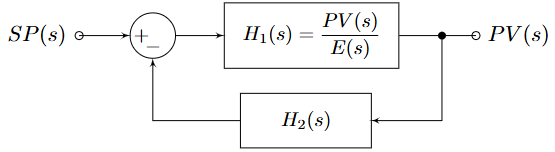

Sendo $H_1(s)$ a função de Transferência da Malha de Controle e $H_2(s)$, a Malha de Realimentação, a equivalente $H(s)$ do Sistema em Malha Fechada é dada como: $$$$

$$ H(s) = \frac{H_1(s)}{1+H_1(s)\cdot H_2(s)}, $$ $$$$

em que o sinal do denominador é oposto à realimentação de $PV(s)$. A realimentação padrão é negativa e unitária.

Acesse [Método feedback()](https://python-control.readthedocs.io/en/0.10.1/generated/control.InterconnectedSystem.html#control.InterconnectedSystem.feedback)

Por implementação, o método `ctrl.feedback()` não retorna a Função de Transferência na forma canônica, sendo necessário ajuste com o termo independente do denominador. Utilize o método `ctrl.tfdata()` para resgatar os polinômios.


In [26]:
[num, den] = ctrl.tfdata(ctrl.feedback(sys))
formaCanonica = den[0][0][1]

sys_fechada = ctrl.tf(num/formaCanonica, den/formaCanonica)
print(sys_fechada)

<TransferFunction>: sys[51]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.75
---------
2.5 s + 1



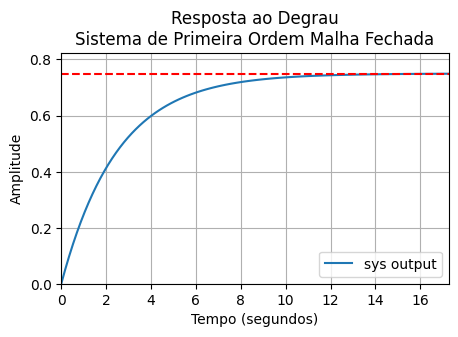

<Figure size 640x480 with 0 Axes>

In [27]:
# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.set_responde(sys_fechada).plot()
[Tempo, Amplitude] = ctrl.step_response(sys_fechada)

plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude)
plt.axhline(y=Amplitude[-1], color='r', linestyle='--')

plt.title('Resposta ao Degrau\nSistema de Primeira Ordem Malha Fechada')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.min(Amplitude), np.max(Amplitude)*1.1])
plt.legend(['sys output'], loc='lower right'), plt.grid(True)

print()
plt.show(), plt.savefig('malhaFechada.png', dpi=300);

In [28]:
infos_malhaFechada = ctrl.step_info(sys_fechada);
print('Parâmetros da resposta do Sistema em Malha Fechada:',
      f'  - Tempo de Subida: {infos_malhaFechada.get("RiseTime"):.2f} [s]',
      f'  - Tempo de Acomodação: {infos_malhaFechada.get("SettlingTime"):.2f} [s]',
      f'  - Valor Final: {infos_malhaFechada.get("SteadyStateValue"):.2f}', sep='\n')

Parâmetros da resposta do Sistema em Malha Fechada:
  - Tempo de Subida: 5.58 [s]
  - Tempo de Acomodação: 9.94 [s]
  - Valor Final: 0.75


A definição do erro ao longo do Tempo, com $e = SP(s) - PV(s)$ permite visualizar a evolução da métrica:

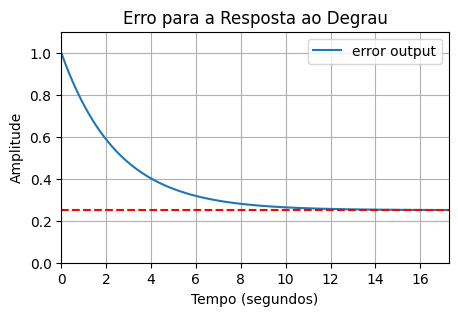

<Figure size 640x480 with 0 Axes>

In [29]:
# Defina a Amplitude do Degrau de Entrada:
amplitudeDegrau = 1;

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# ctrl.set_responde(sys_fechada).plot()
[Tempo, Amplitude] = ctrl.step_response(sys_fechada*amplitudeDegrau)
erro = amplitudeDegrau - Amplitude

plt.figure(figsize=(5, 3)), plt.plot(Tempo, erro)
plt.axhline(y=np.min(erro), color='r', linestyle='--')

plt.title('Erro para a Resposta ao Degrau')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([np.minimum(0, np.min(erro)), np.max(erro)*1.1])
plt.legend(['error output'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('malhaFechada.png', dpi=300);

### **Malha Aberta *vs* Malha Fechada**

In [30]:
print('Comparação entre Sistemas em Malha Aberta e Fechada:')

if infos_malhaAberta.get('RiseTime') < infos_malhaFechada.get('RiseTime'): print(f'  - O sistema em malha aberta tem menor Tempo de Subida.')
else: print(f'  - O sistema em malha fechada tem menor Tempo de Subida.')

if infos_malhaAberta.get('SettlingTime') < infos_malhaFechada.get('SettlingTime'): print(f'  - O sistema em malha aberta tem menor Tempo de Acomodação.')
else: print(f'  - O sistema em malha fechada tem menor Tempo de Acomodação.')

if infos_malhaAberta.get('SteadyStateValue') > infos_malhaFechada.get('SteadyStateValue'): print(f'  - O sistema em malha aberta tem maior Valor Final.')
else: print(f'  - O sistema em malha fechada tem maior Valor Final.')

Comparação entre Sistemas em Malha Aberta e Fechada:
  - O sistema em malha fechada tem menor Tempo de Subida.
  - O sistema em malha fechada tem menor Tempo de Acomodação.
  - O sistema em malha aberta tem maior Valor Final.


Por análise, os Sistemas de Controle em Malha Fechada são mais rápidos em relação aos Sistemas em Malha Aberta, porém há uma perda de amplitude do processo.

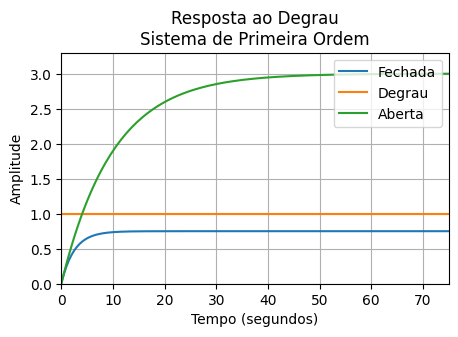

<Figure size 640x480 with 0 Axes>

In [31]:
# Definindo o Tempo total de simulação:
t = np.linspace(0, 75, 150);

# Amostras de Amplitude da Resposta ao Degrau ao longo do Tempo.
# O parâmetro opcional T especifica os instantes de amostragem do processo.
[Tempo, Amplitude_malhaFechada] = ctrl.step_response(sys_fechada, T=t)
plt.figure(figsize=(5, 3)), plt.plot(Tempo, Amplitude_malhaFechada)

[Tempo, Amplitude_malhaAberta] = ctrl.step_response(sys, T=t)
Degrau = np.ones(np.size(Tempo))
plt.plot(Tempo, Degrau, Tempo, Amplitude_malhaAberta)

plt.title('Resposta ao Degrau\nSistema de Primeira Ordem')
plt.xlabel('Tempo (segundos)'), plt.xlim([0, Tempo[-1]])
plt.ylabel('Amplitude'), plt.ylim([0, np.max([np.max(Amplitude_malhaAberta), np.max(Amplitude_malhaFechada), np.max(Degrau)])*1.1])
plt.legend(['Fechada', 'Degrau', 'Aberta'], loc='upper right'), plt.grid(True)

print(), plt.show(), plt.savefig('amplitudeDegrau.png', dpi=300);
